<a href="https://colab.research.google.com/github/erickcori/Delphi_CIA_XAI_WaterReuse/blob/main/notebooks/red_influencias_barreras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📥 Cargar matriz CIM
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Subida de archivo manual
from google.colab import files
uploaded = files.upload()  # Selecciona 'datos CIM.xlsx'

# Leer y normalizar
cim = pd.read_excel("datos CIM.xlsx", index_col=0).fillna(0)
scaler = MinMaxScaler()
cim_normalized = pd.DataFrame(scaler.fit_transform(cim), index=cim.index, columns=cim.columns)

Saving datos CIM.xlsx to datos CIM.xlsx
Saving datos.xlsx to datos.xlsx


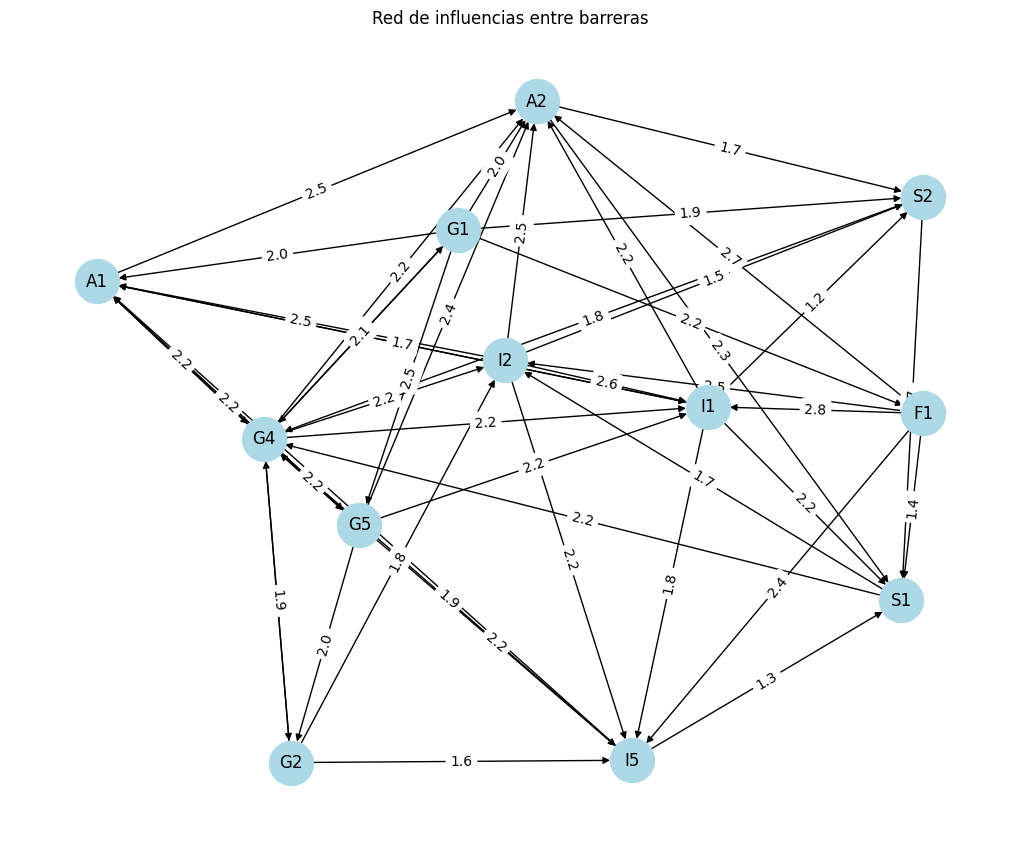

In [2]:
# 🧠 Red de influencias entre barreras (grafo dirigido)
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo dirigido desde matriz CIM original (no normalizada)
G = nx.from_pandas_adjacency(cim, create_using=nx.DiGraph)

# Calcular centralidades
out_degree = dict(G.out_degree(weight='weight'))
betweenness = nx.betweenness_centrality(G, weight='weight')

# Visualización
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v): f'{d["weight"]:.1f}' for u,v,d in G.edges(data=True)})
plt.title("Red de influencias entre barreras")
plt.show()

In [3]:
# 📈 Ranking de centralidades
centrality_df = pd.DataFrame({
    'OutDegree': pd.Series(out_degree),
    'Betweenness': pd.Series(betweenness)
}).sort_values(by='OutDegree', ascending=False)

centrality_df

,OutDegree,Betweenness
G4,16.93,0.418182
G5,13.26,0.000000
G1,12.25,0.090909
F1,11.73,0.000000
I2,11.33,0.068182
I1,9.01,0.050000
A1,8.91,0.045455
G2,5.41,0.009091
A2,4.00,0.000000
S1,3.91,0.118182
